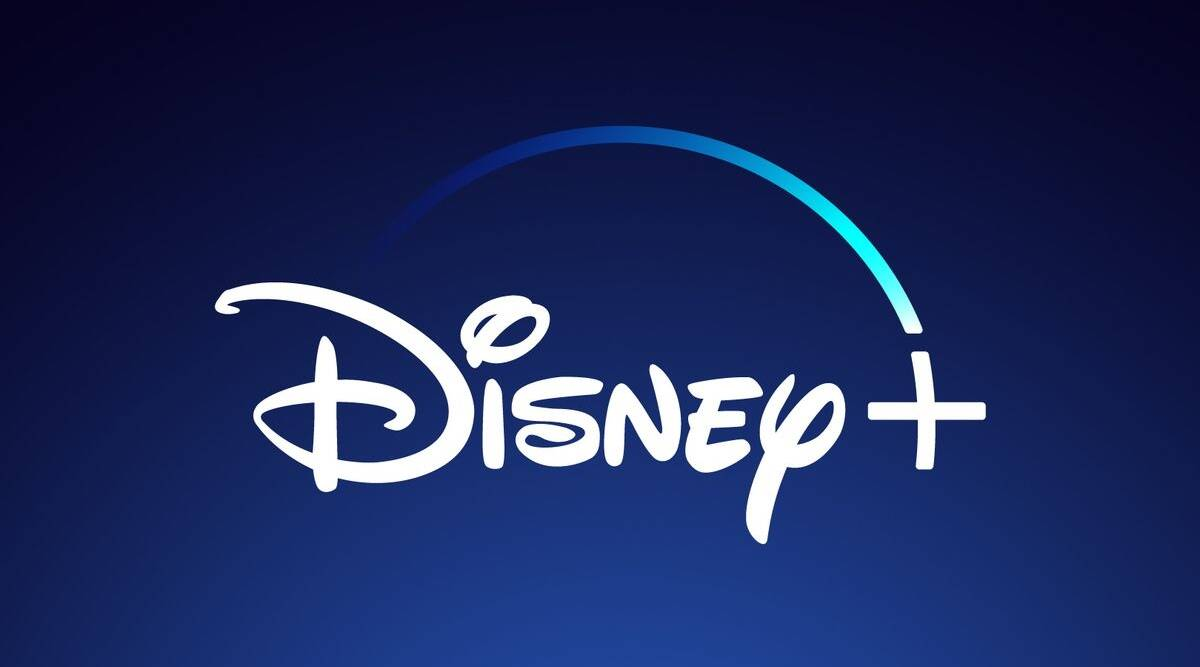

### Disney+ is an American subscription video on-demand over-the-top streaming service owned and operated by the Media and Entertainment Distribution division of The Walt Disney Company.[1] The service primarily distributes films and television series produced by The Walt Disney Studios and Walt Disney Television, with dedicated content hubs for the brands Disney, Pixar, Marvel, Star Wars, and National Geographic, as well as Star in some regions. Original films and television series are also distributed on Disney+

In [21]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)

import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
plt.rcParams.update({'font.family':'sans-serif'})

In [22]:
df=pd.read_csv(r'E:\Data Analysis with Excel\Kaggle Dataset\disney_plus_titles.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [23]:
# Missing data

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 32.62%
cast null rate: 13.1%
country null rate: 15.1%
date_added null rate: 0.21%
rating null rate: 0.21%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
show_id         1450 non-null object
type            1450 non-null object
title           1450 non-null object
director        977 non-null object
cast            1260 non-null object
country         1231 non-null object
date_added      1447 non-null object
release_year    1450 non-null int64
rating          1447 non-null object
duration        1450 non-null object
listed_in       1450 non-null object
description     1450 non-null object
dtypes: int64(1), object(11)
memory usage: 73.7+ KB


- 5 columns have missing values, with Director missing 1/3 of the time

In [5]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [6]:
df['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [7]:
df["duration"] = df["duration"].astype("int64")
df["season"] = df["season"].astype("int64")

# Dealing with the missing data.

In [24]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
season          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1449
Data columns (total 13 columns):
show_id         1444 non-null object
type            1444 non-null object
title           1444 non-null object
director        1444 non-null object
cast            1444 non-null object
country         1444 non-null object
date_added      1444 non-null datetime64[ns]
release_year    1444 non-null int64
rating          1444 non-null object
duration        1444 non-null int64
listed_in       1444 non-null object
description     1444 non-null object
season          1444 non-null int64
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 107.2+ KB


# Missing values dealt with, but the date isn't quite right yet...

In [11]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,11,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0,11,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,11,November,2021


# Okay, let's visualize

### Build a Pallette using Disney Color 

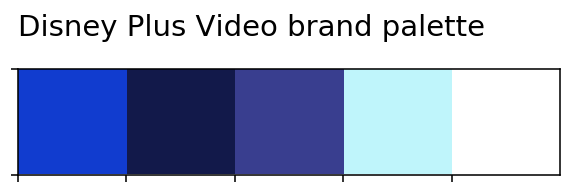

In [25]:
# Palette
sns.palplot(['#113CCF', '#12194A', '#393E8F','#BFF5FB','#FFFFFF'])


plt.title("Disney Plus Video brand palette ",loc='left',fontsize=15,y=1.2)
plt.show()

# Content - Let's explore

Now we've seen how Disney Plus came to dominate our TV screens, let's have a look at the content they offer...

In [26]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T


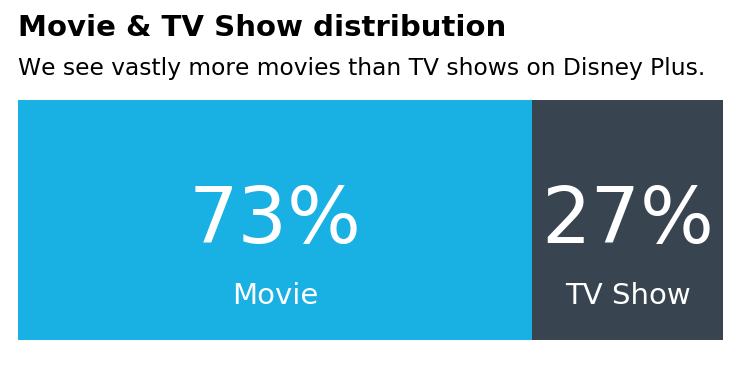

In [27]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#00A8E1', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#232F3E', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Disney Plus.',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

In [15]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 
col = "type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#00A8E1", "#232F3E"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [20]:
df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
show_id,1444,1444,s85,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,1444,2,Movie,1051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,1444,1444,Fantastic Four,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,1444,610,No Data,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,1444,1189,No Data,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1444,89,United States,1219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,1444,166,2019-11-12 00:00:00,722,2019-10-01 00:00:00,2021-11-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,1444,NaN,NaN,NaN,NaN,NaN,2003.04,21.8864,1928,1999,2011,2018,2021
rating,1444,9,TV-G,318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1444,NaN,NaN,NaN,NaN,NaN,52.3525,47.1766,0,0,47,93,183


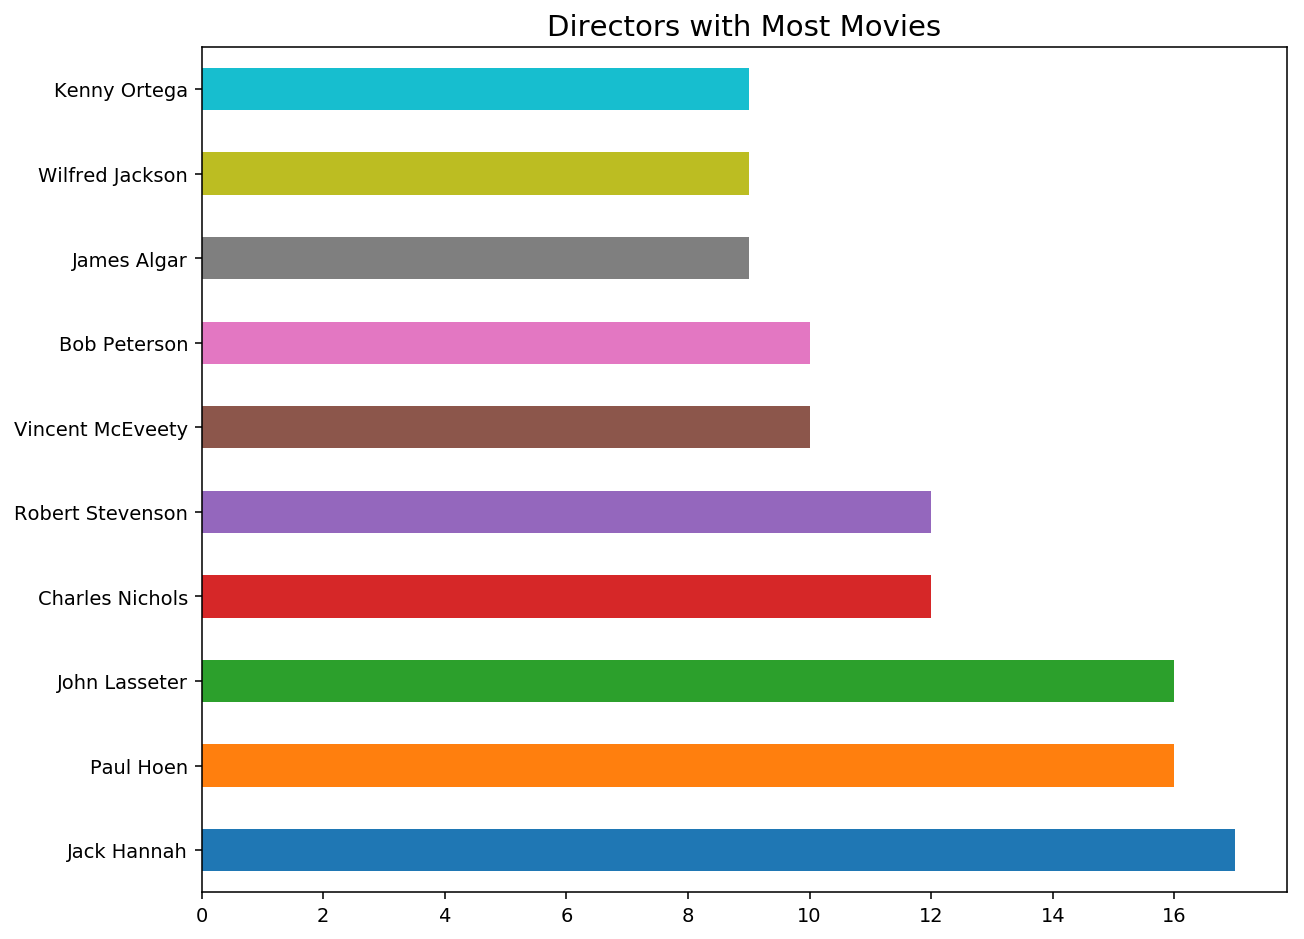

In [21]:
plt.figure(figsize=(10,8))
# Drop 'No Data' row
df2 = df["director"].value_counts().head(11)
df2.tail(10).plot(kind='barh')
plt.title("Directors with Most Movies", size=15)
plt.show()

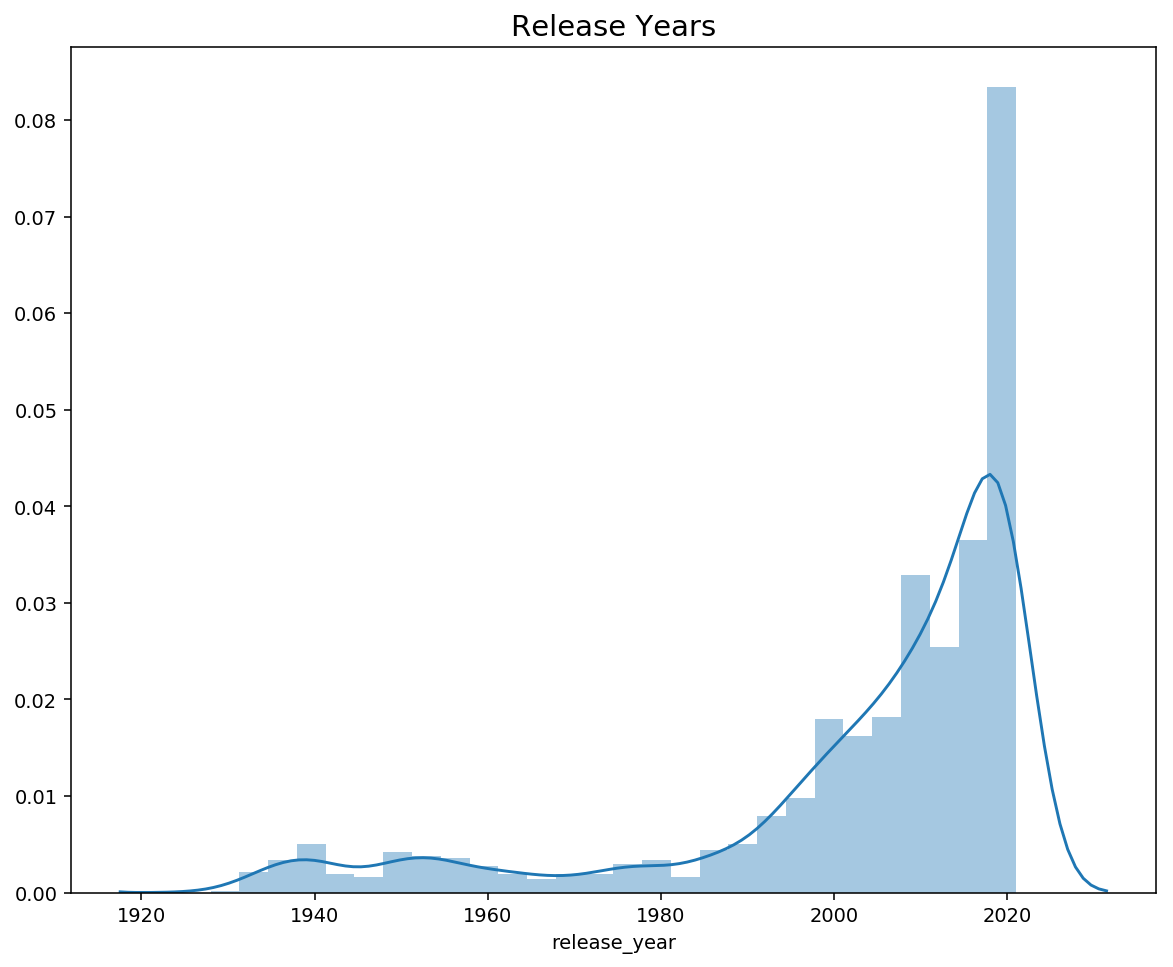

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(df["release_year"])
plt.title("Release Years", size=15)
plt.show()

In [23]:
#function that parses column values
def parse_column(column):
    column = column.str.split(',')

    series = list()
    for index, value in column.items():
        series.append(value)

    words = list()
    counts = dict()
    for obj in series:
        for word in obj:
            word = str(word).lstrip()
            words.append(word)

    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    counts_items = counts.items()
    data_list = list(counts_items)
    new_df = pd.DataFrame(data_list)
    new_df = new_df.rename({0: column.name, 1: 'total'}, axis=1)
    new_df = new_df.sort_values(by=['total'], ascending=False)
    new_df = new_df.reset_index(drop=True)
    return new_df

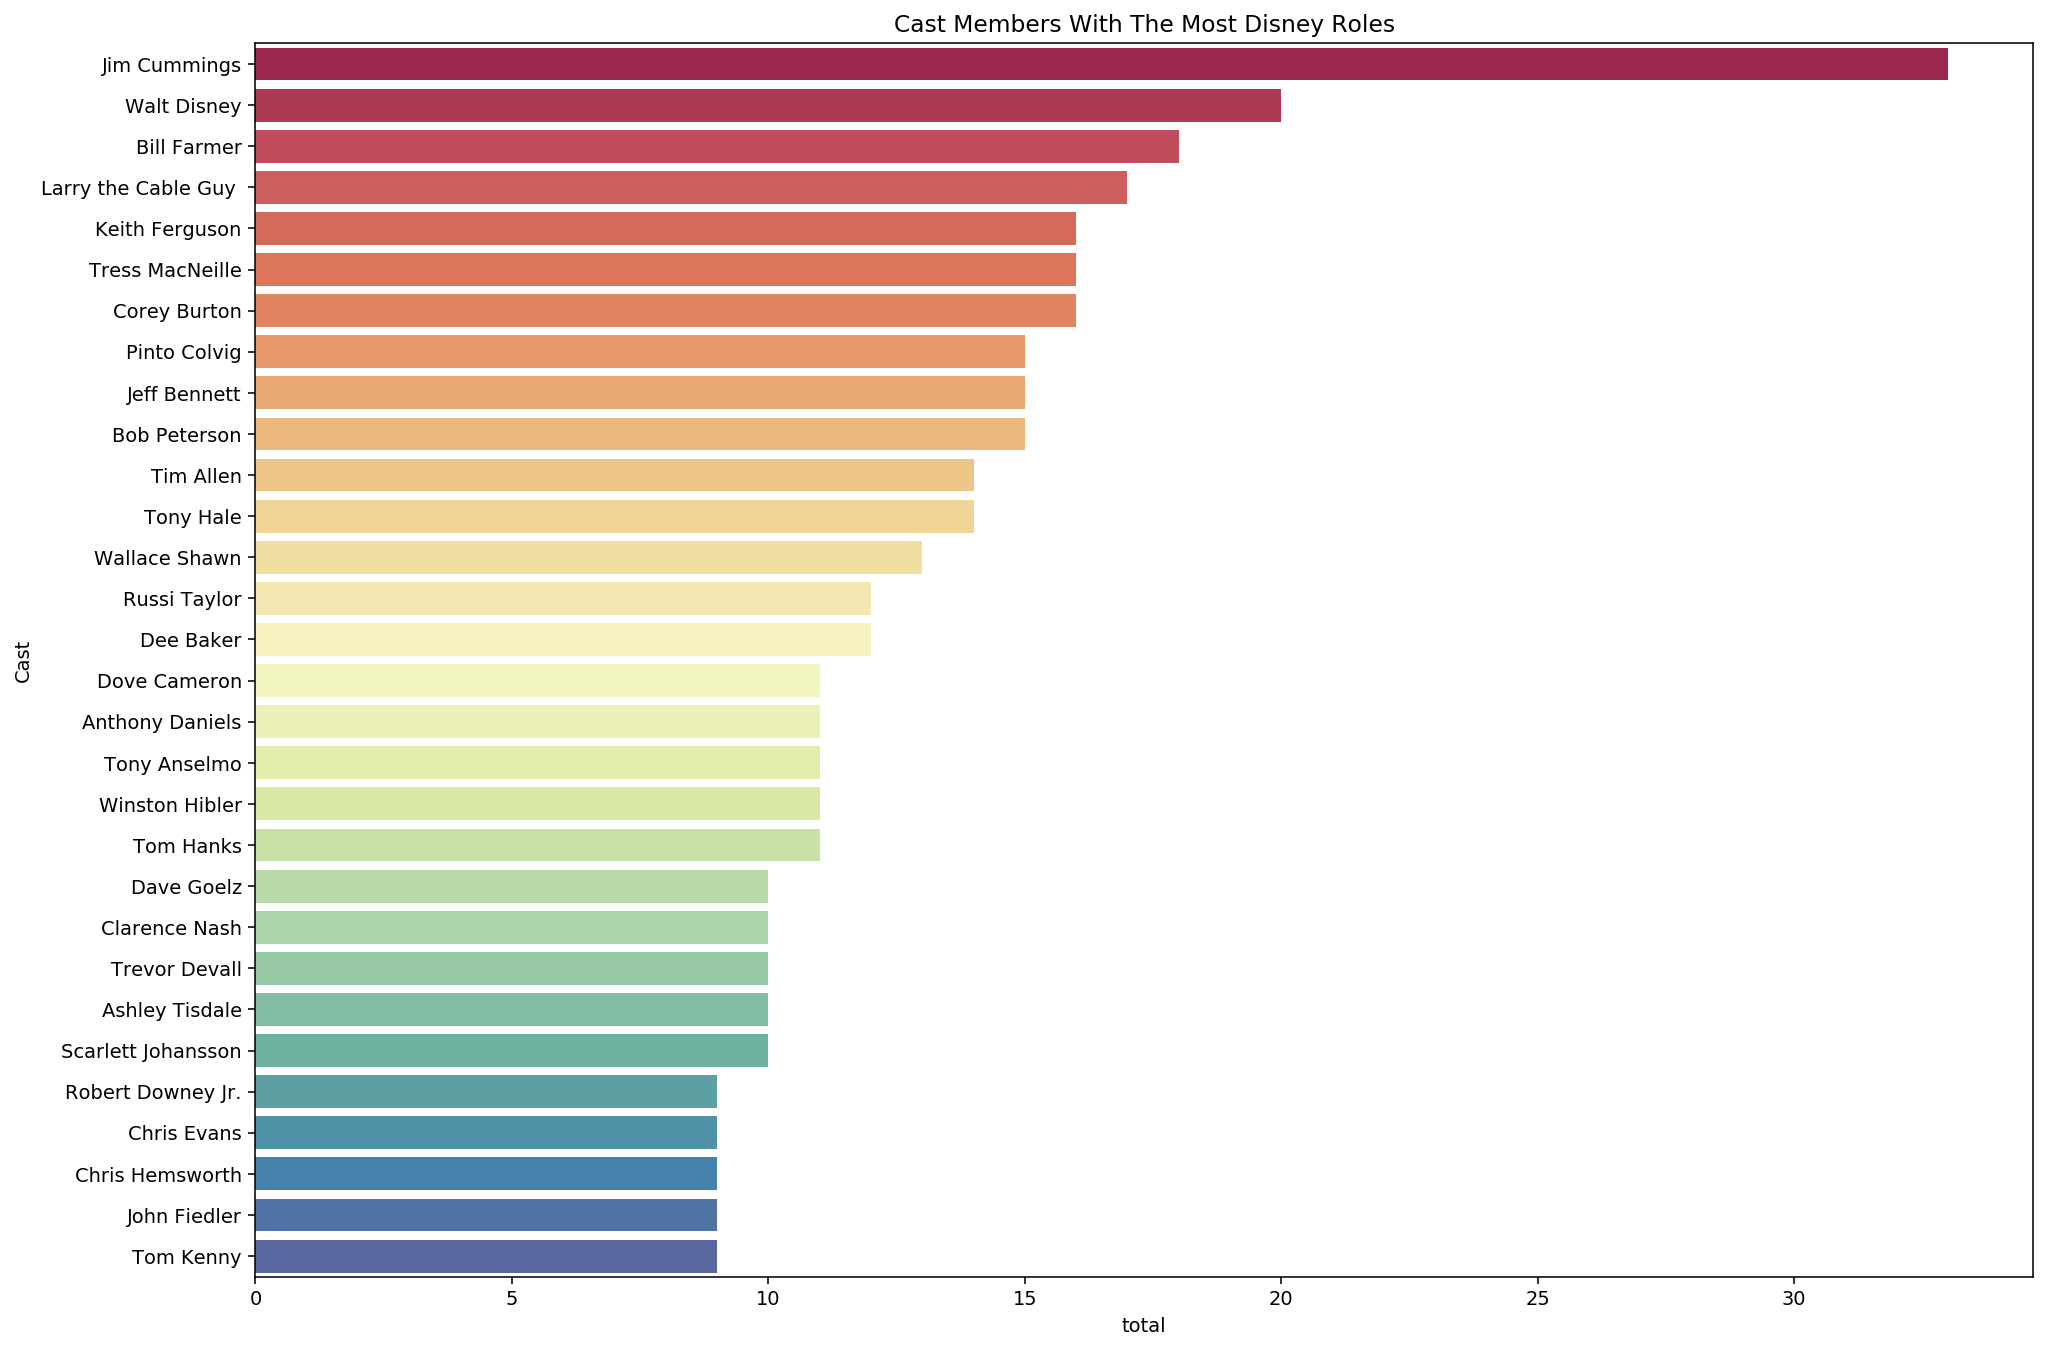

In [24]:
mask = df['cast'].notnull()
disney_castdf = df['cast'][mask]
disney_cast = parse_column(disney_castdf)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
axes.set_title('Cast Members With The Most Disney Roles')
bar2 = sns.barplot(x='total', y='cast', data=disney_cast[1:31], ax=axes, palette='Spectral')
bar2.set(ylabel='Cast')

plt.tight_layout(pad=2);

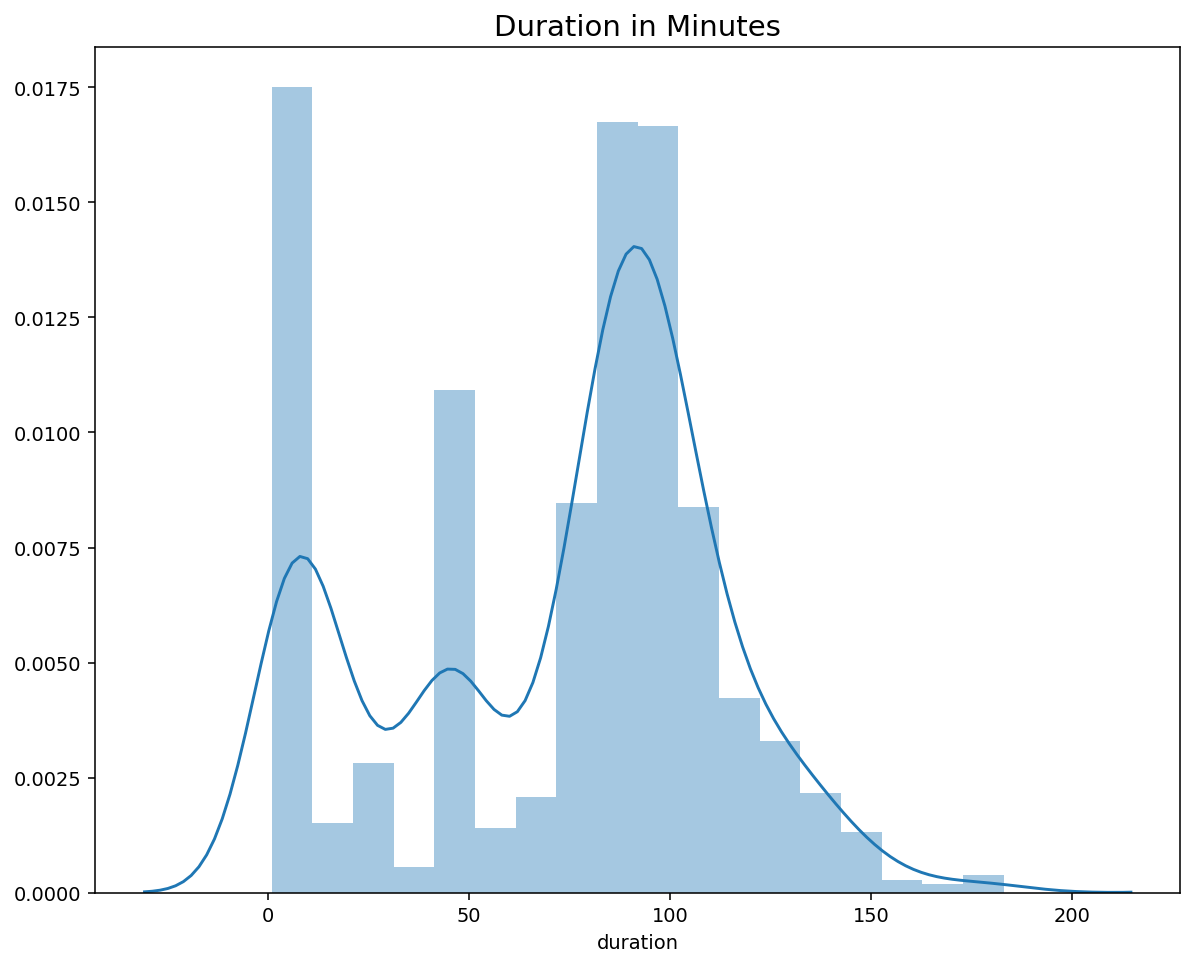

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(df[df["duration"]>0]["duration"])
plt.title("Duration in Minutes", size=15)
plt.show()

# By Country

So we now know there are much more movies than TV shows on Disney Plus (which surprises me!).

What about if we look at content by country? 

I would imagine that the USA will have the most content. I wonder how my country, the India, will compare?

In [26]:
# Quick feature engineering

# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

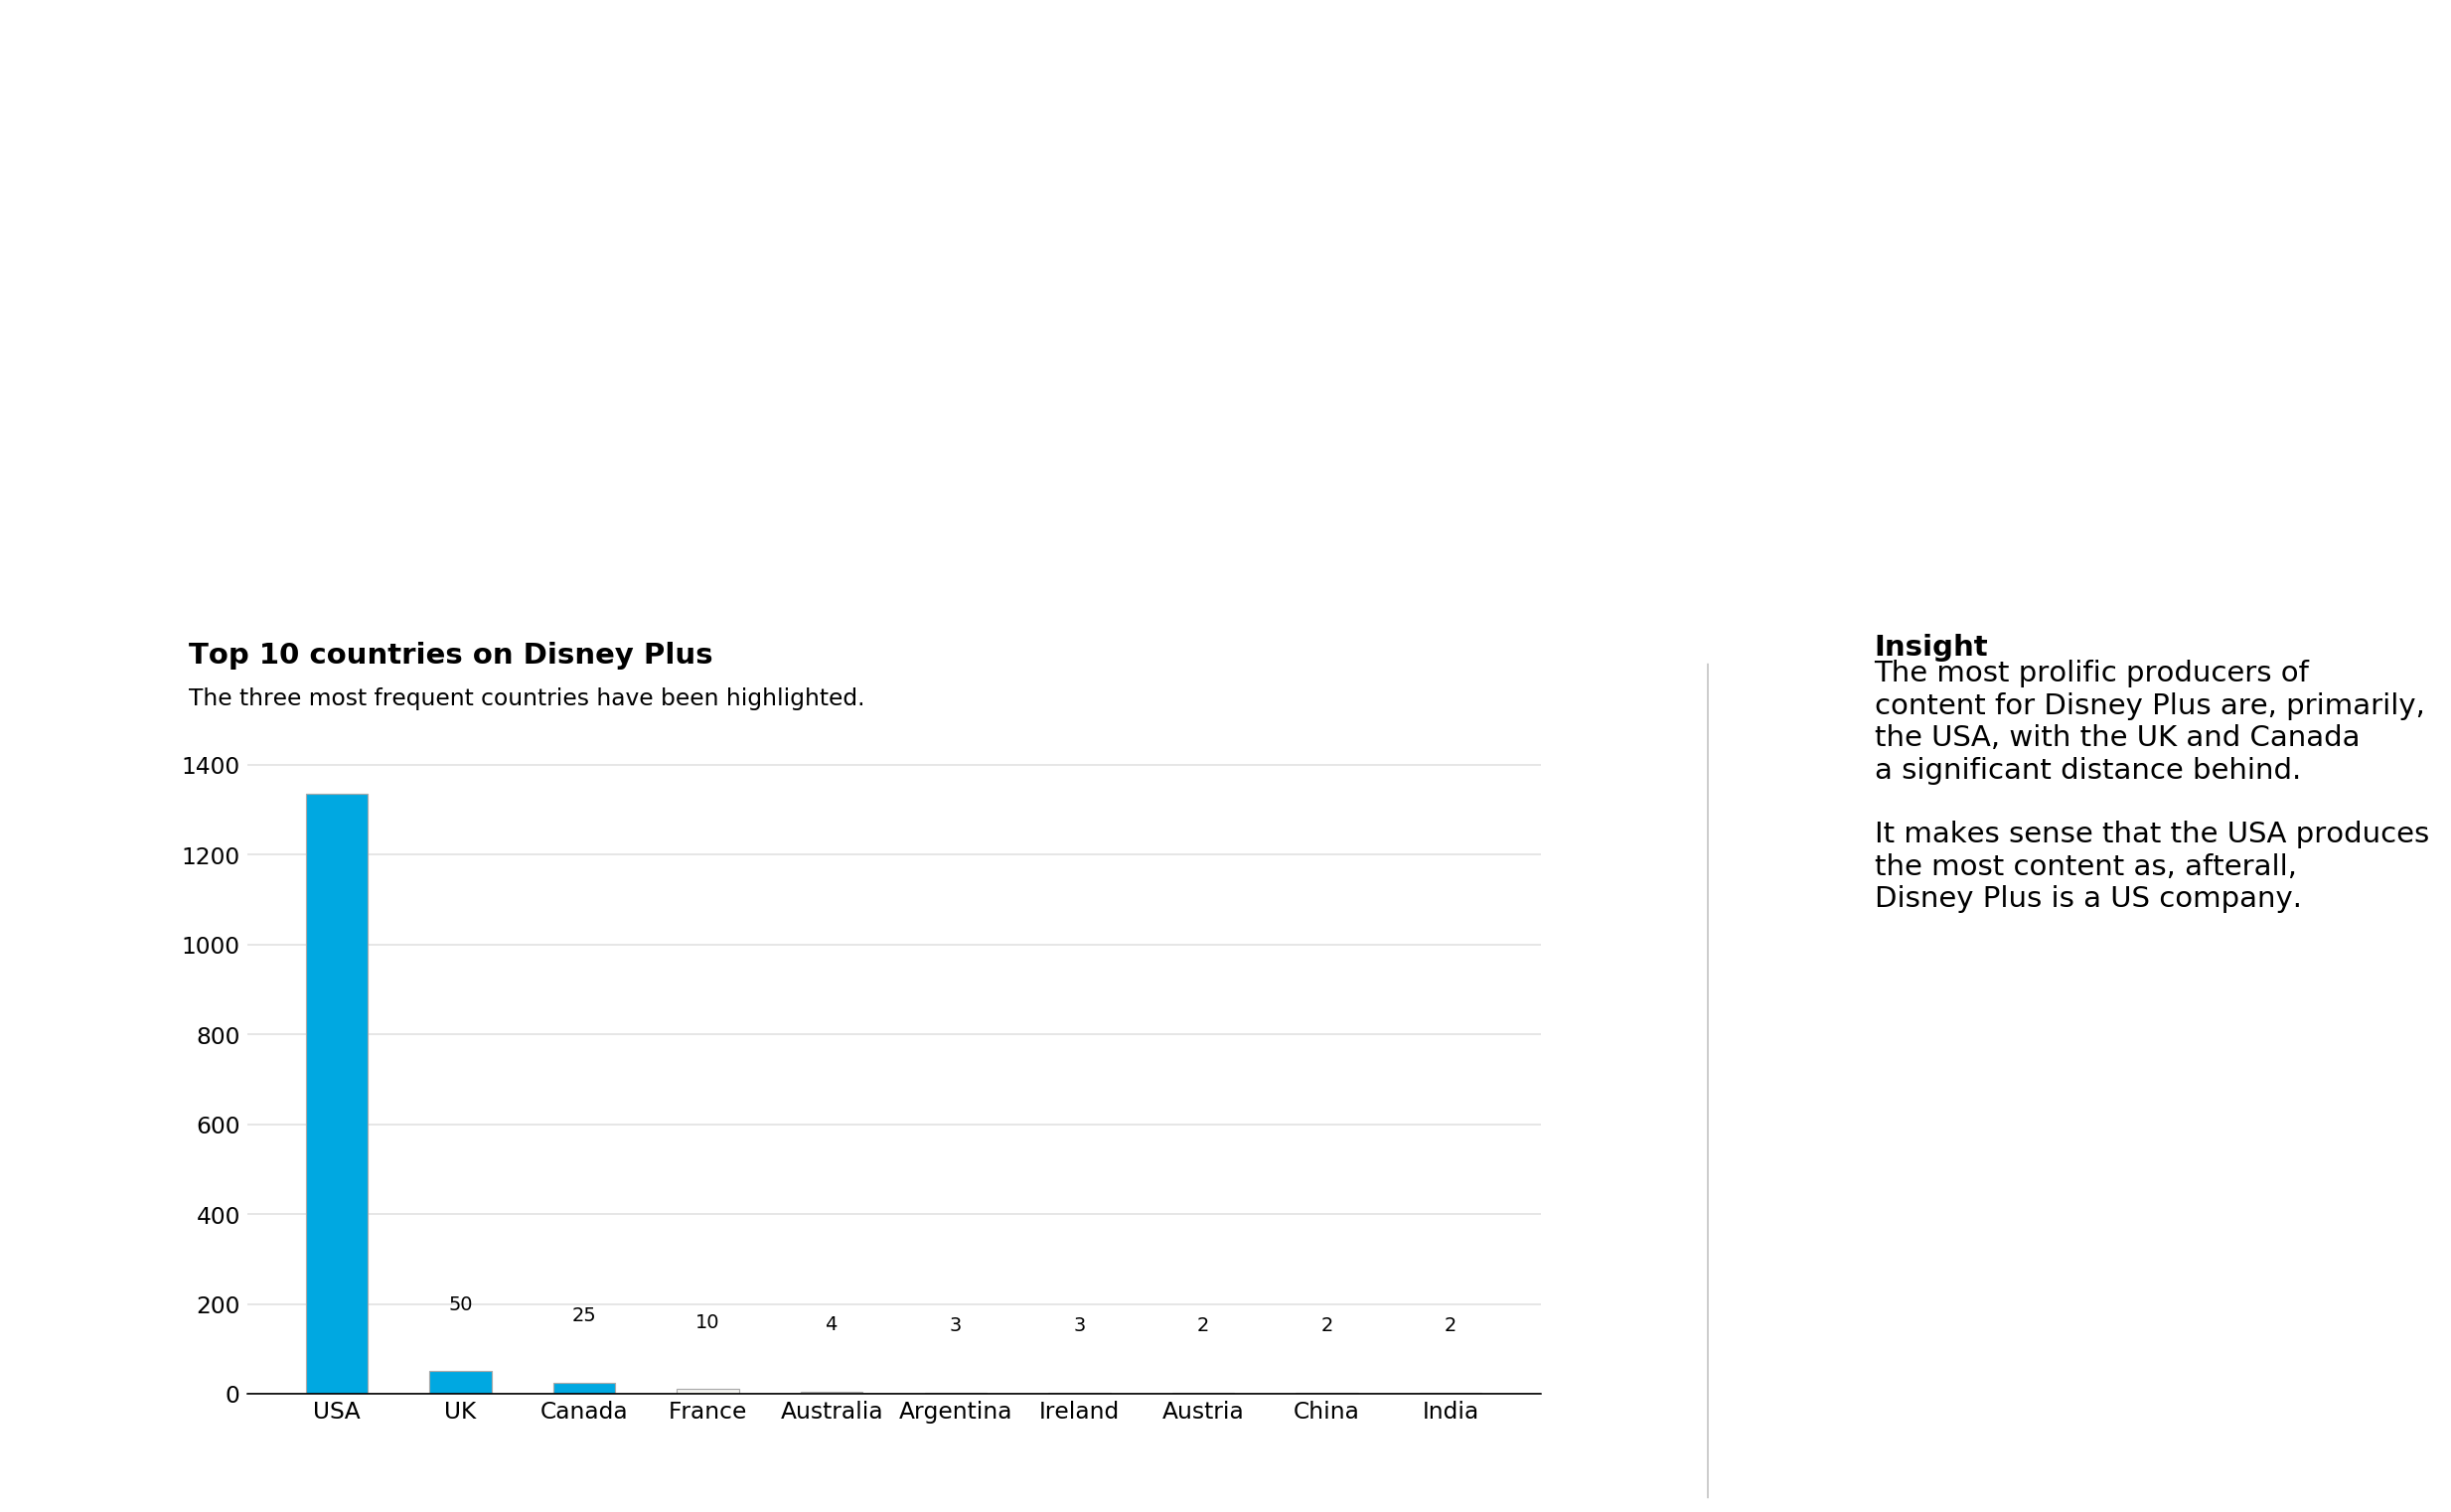

In [29]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#00A8E1' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Disney Plus', fontsize=15, fontweight='bold')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold')

fig.text(1.1, 0.67, '''
The most prolific producers of
content for Disney Plus are, primarily,
the USA, with the UK and Canada
a significant distance behind.

It makes sense that the USA produces 
the most content as, afterall, 
Disney Plus is a US company.
'''
         , fontsize=15, fontweight='light')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1600, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


As predicted, the USA dominates. 

The UK is a top contender too, but still some way behind India.

How does content by country vary? 

# Ratings

Let's briefly check out how ratings are distributed

In [30]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

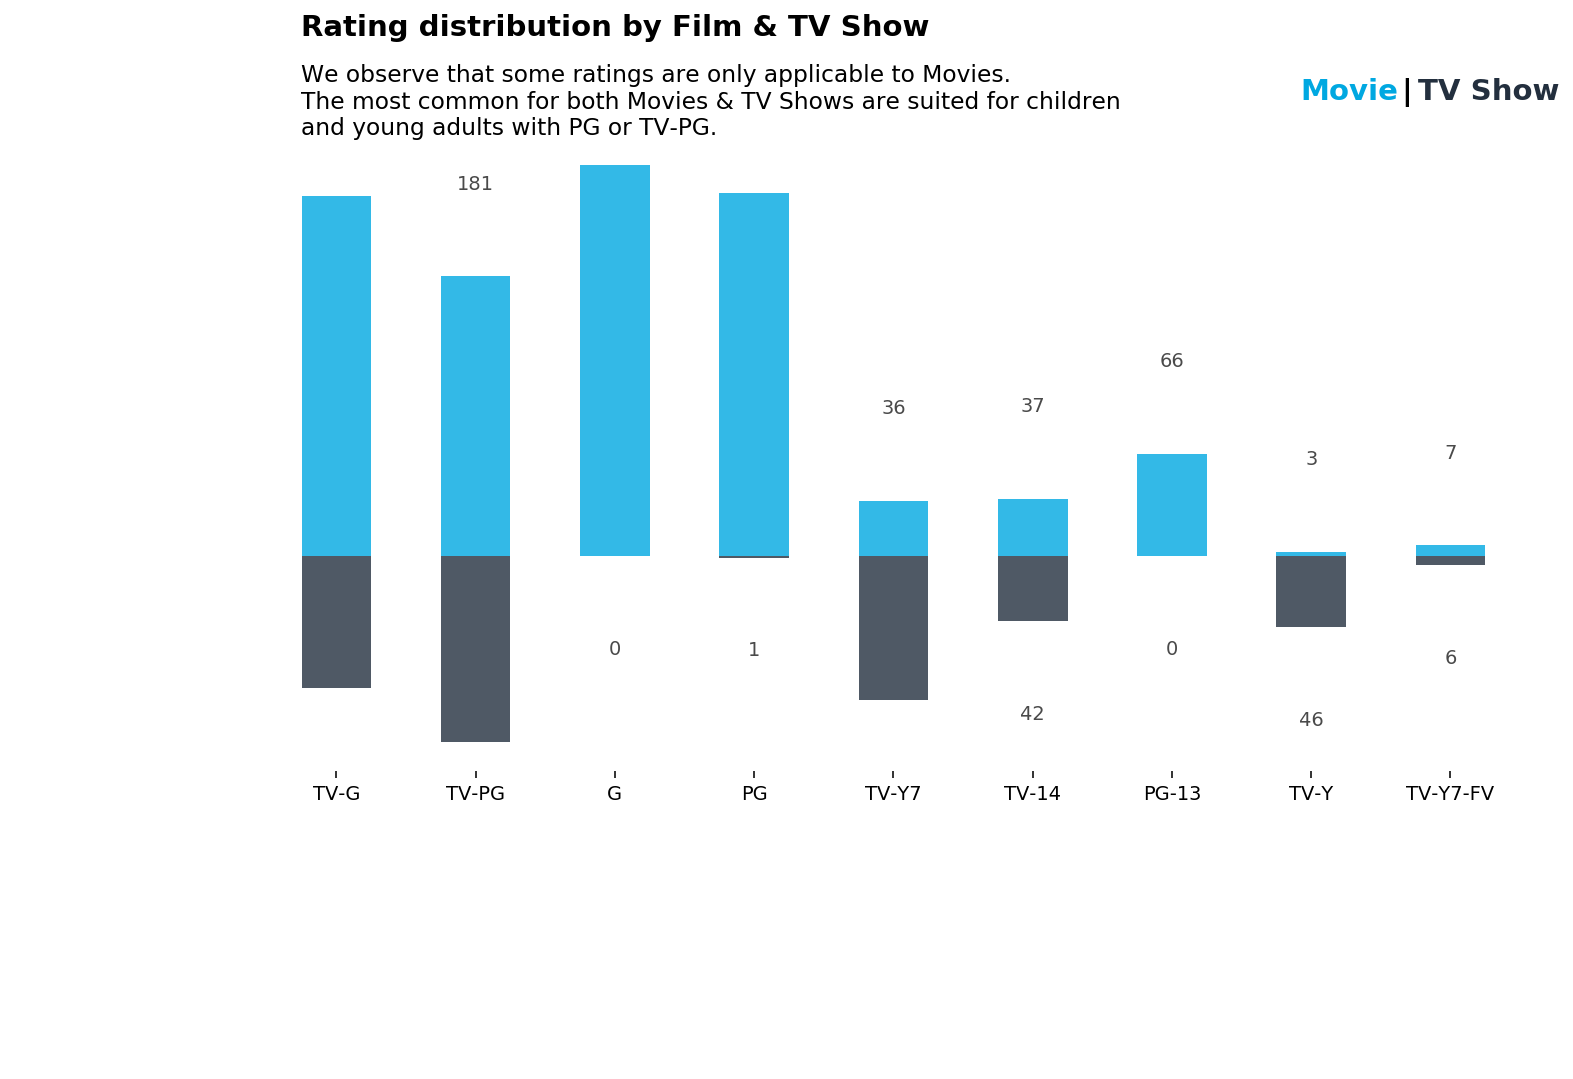

In [43]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#00A8E1', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#232F3E', alpha=0.8, label='TV Show')


# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light',color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', color='#4a4a4a')
    
 

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns)
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold')
fig.text(0.16, 0.85, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are suited for children
and young adults with PG or TV-PG.
'''

, fontsize=12, fontweight='light')


fig.text(0.755,0.924,"Movie", fontweight="bold", fontsize=15, color='#00A8E1')
fig.text(0.815,0.924,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontsize=15, color='#232F3E')

plt.show()

# How has content been added over the years?

As we saw in the timeline at the start of this analysis, Disney Plus went global in 2016 - and it is extremely noticeable in this plot.

The increase is Movie content is remarkable.

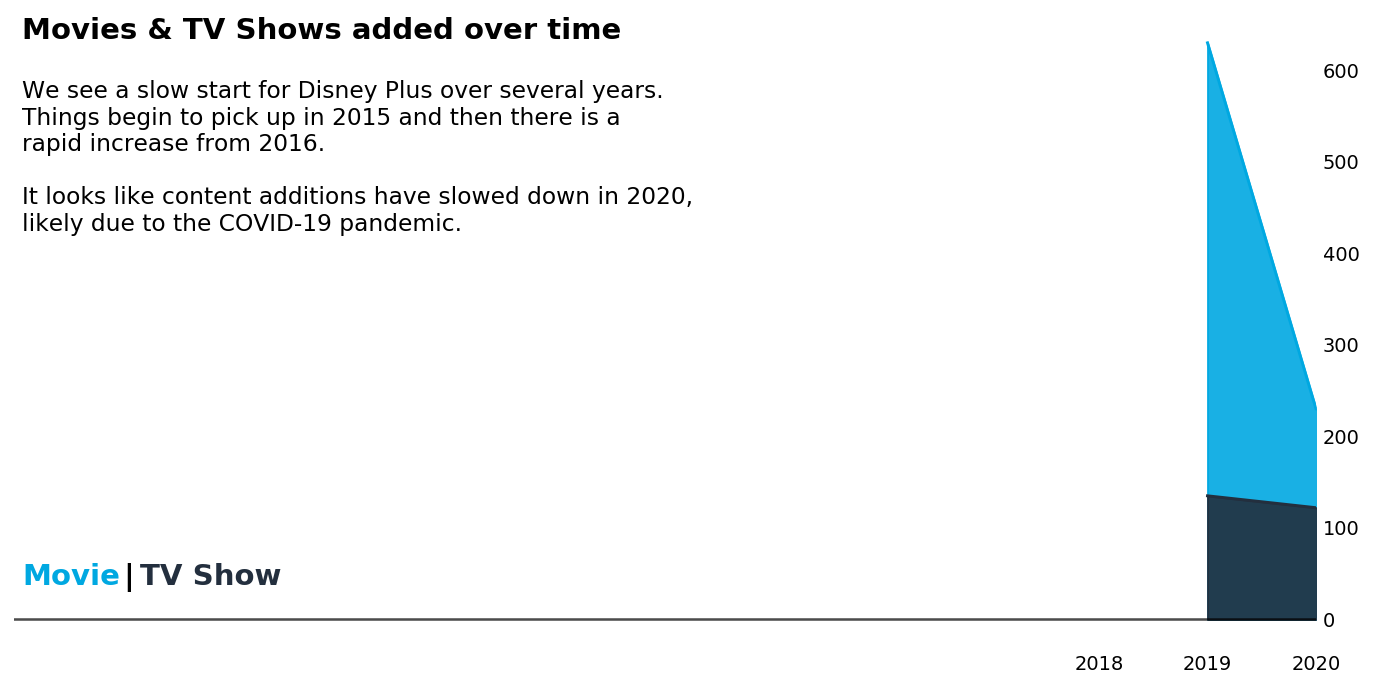

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#00A8E1", "#232F3E"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2018, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold')
fig.text(0.13, 0.59, 
'''We see a slow start for Disney Plus over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontsize=15, color='#00A8E1')
fig.text(0.19,0.2,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontsize=15, color='#232F3E')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# We can view the same plot, but as a cumulative total...

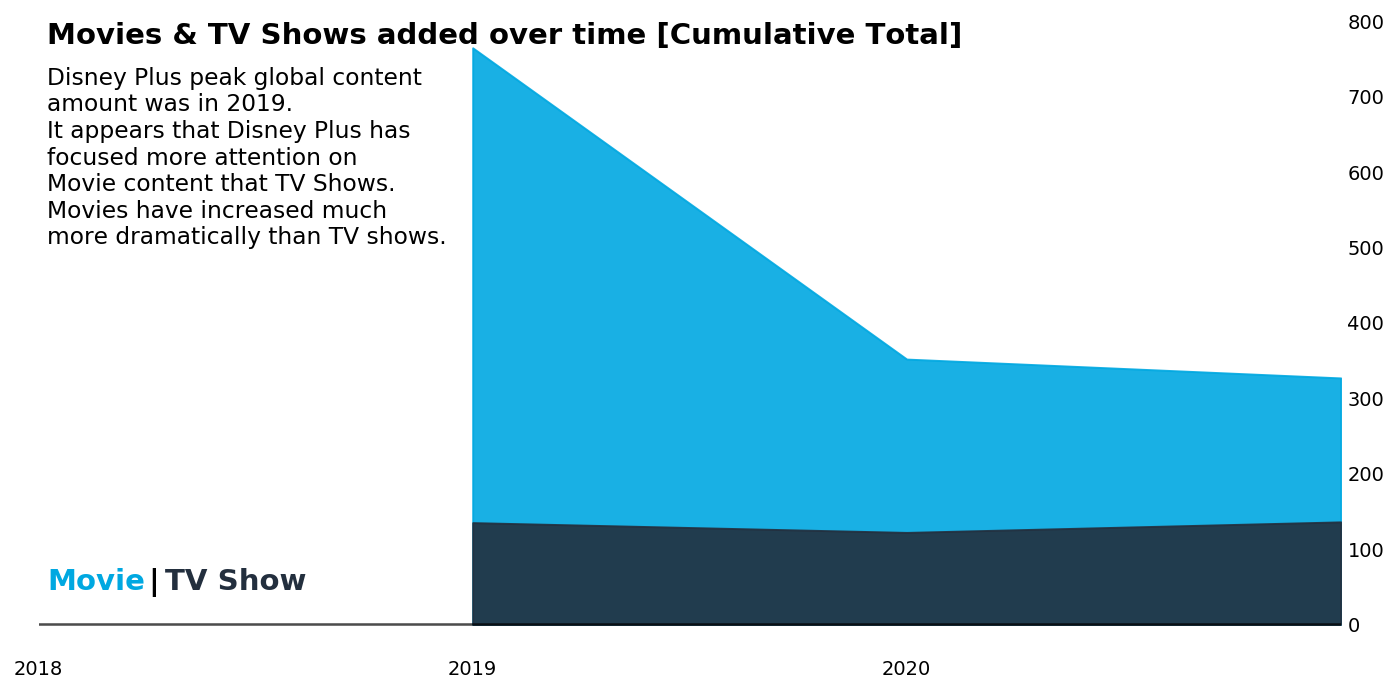

In [33]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#00A8E1", "#232F3E"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2018,2021)
plt.xticks(np.arange(2018, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold')
fig.text(0.13, 0.58, 
'''Disney Plus peak global content 
amount was in 2019.
It appears that Disney Plus has 
focused more attention on  
Movie content that TV Shows. 
Movies have increased much 
more dramatically than TV shows.
'''

, fontsize=12, fontweight='light')



fig.text(0.13,0.2,"Movie", fontweight="bold", fontsize=15, color='#00A8E1')
fig.text(0.19,0.2,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontsize=15, color='#232F3E')

ax.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

# Month-by-Month

We've seen how content has increased over the years, but are there certain months that, on average, tend to enjoy more content being added?

I'll show this in a couple of ways - a cumulative year view, and also as a radial plot...

In [34]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

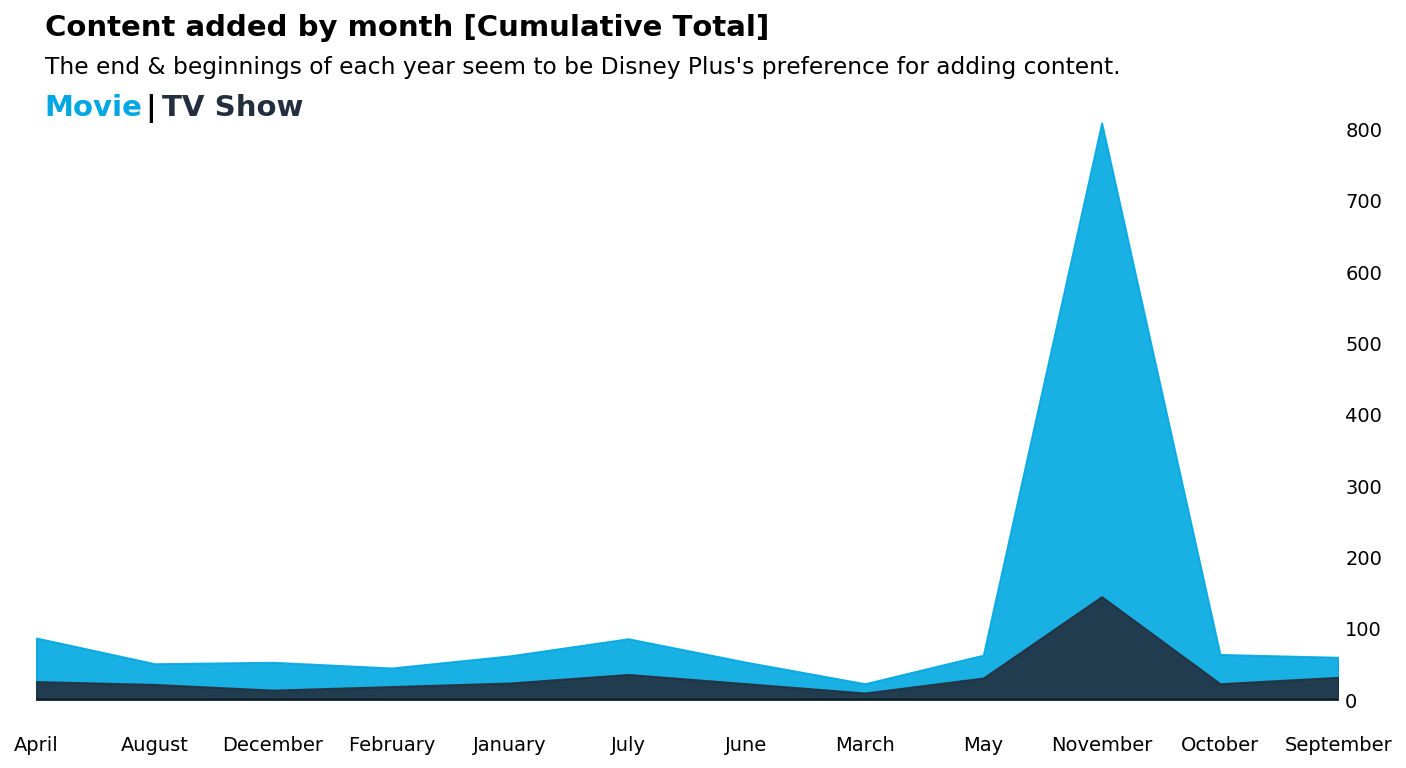

In [35]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#00A8E1", "#232F3E"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, rotation=0)
ax.margins(x=0) # remove white spaces next to margins


fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Disney Plus's preference for adding content."

, fontsize=12, fontweight='light')



fig.text(0.13,0.855,"Movie", fontweight="bold", fontsize=15, color='#00A8E1')
fig.text(0.19,0.855,"|", fontweight="bold", fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontsize=15, color='#232F3E')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Movie Genres

Let's now explore movie genres a little...

In [36]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Disney Plus palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#232F3E', '#00A8E1','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Disney Plus {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 36 types in the Disney Plus Movie Dataset


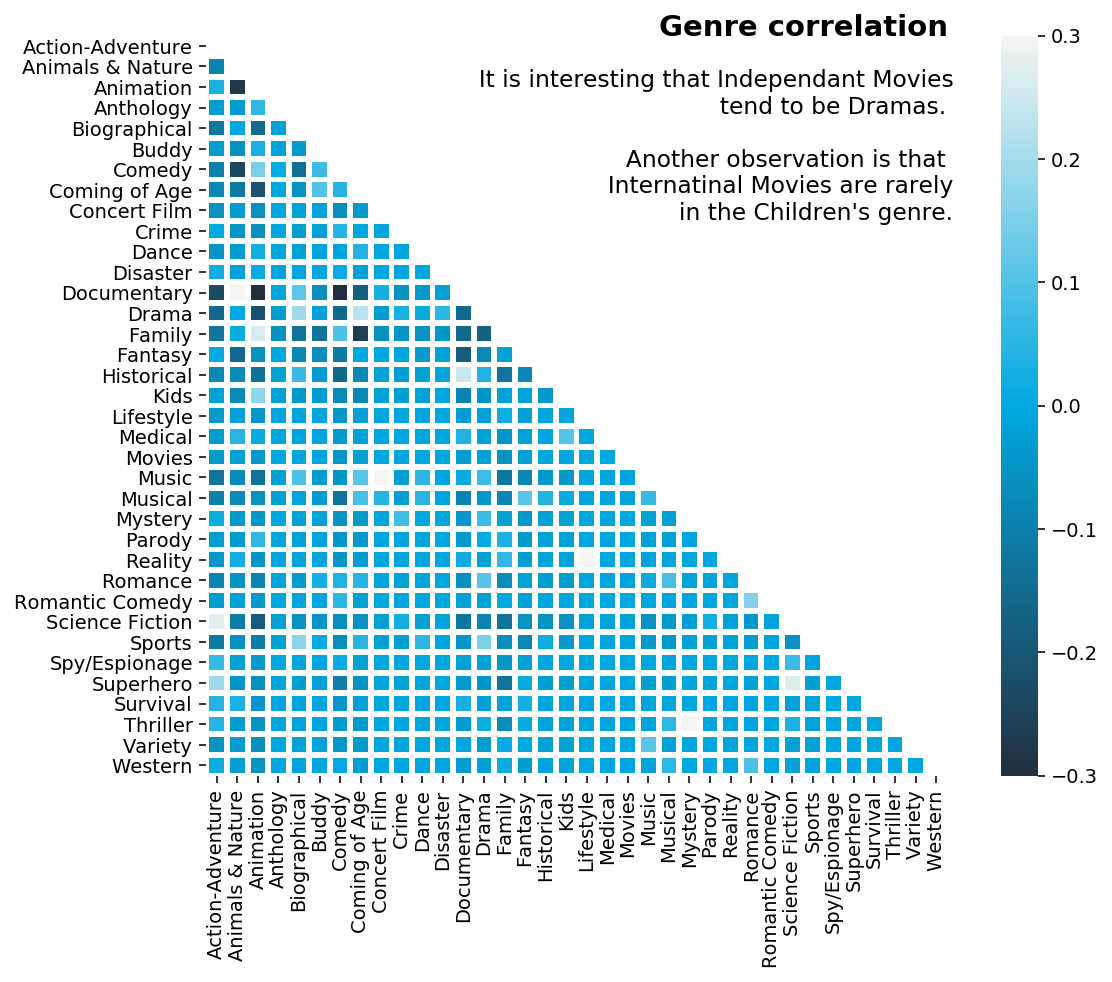

In [37]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

In [38]:
data = df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']


df_heatmap = df.loc[df['first_country'].isin(data)]

In [39]:
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

# Target Ages

Does Disney Plus uniformly target certain demographics? Or does this vary by country?



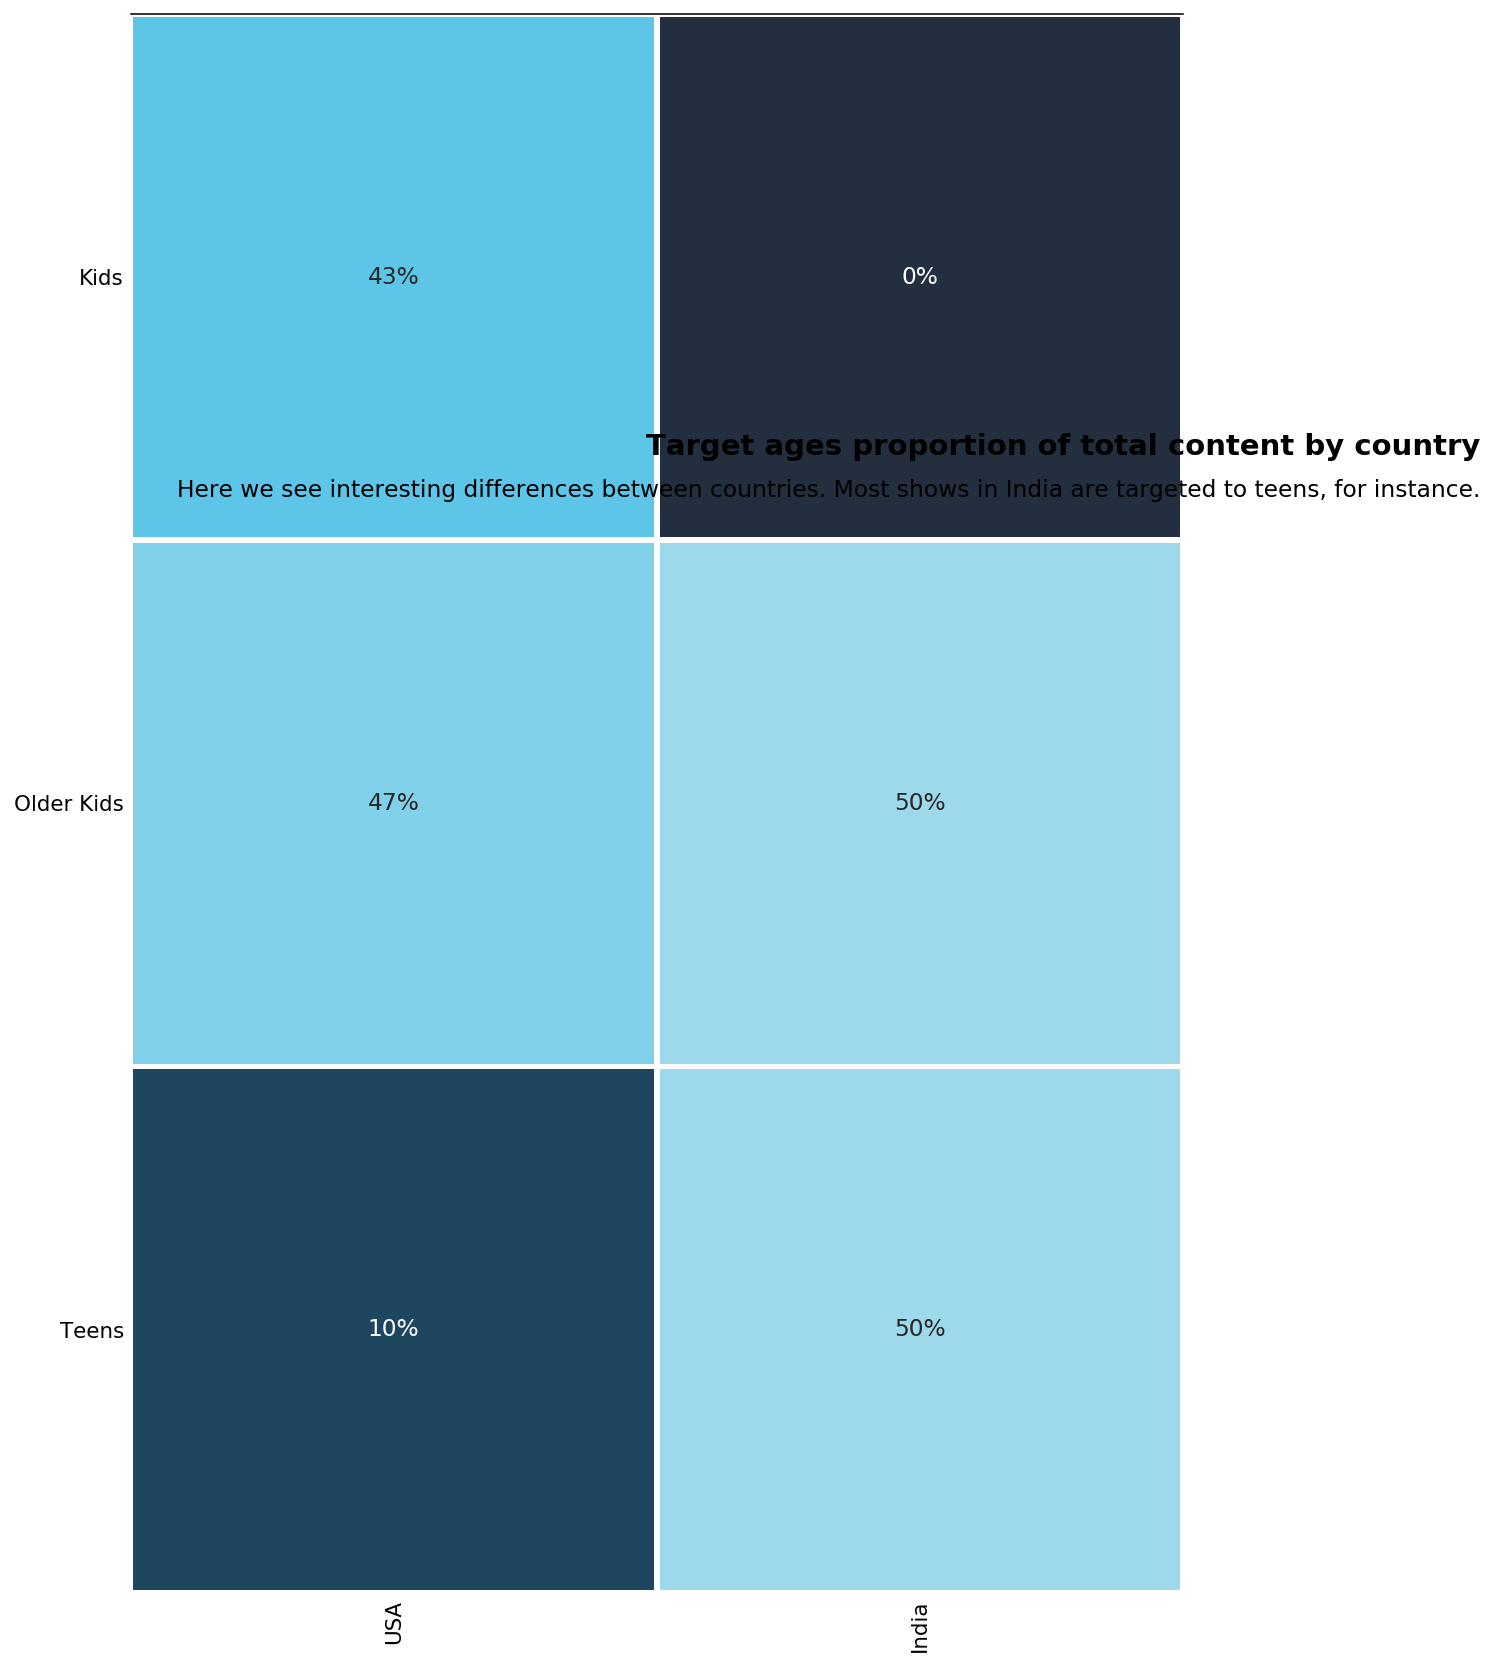

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['USA', 'India',]

age_order = ['Kids','Older Kids','Teens']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(0.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontsize=15,ha='right')   
fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12) 

ax.set_yticklabels(ax.get_yticklabels(),  rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

Very interesting results. 

It is also interesting to note similarities between culturally similar countries - the US & UK are closey aligned with their Disney Plus target ages, yet vastly different to say, India or Japan!

# Let's have a quick look at the lag between when content is released and when it is added on Disney Plus

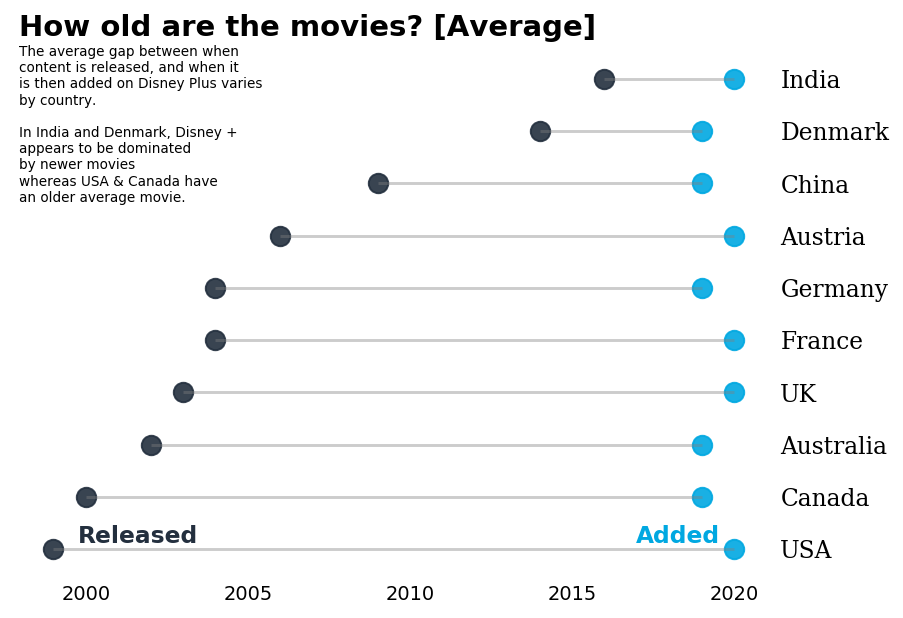

In [65]:
# Data

df_movies
df_tv

### Relevant groupings

data = df_movies.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontsize=12, color='#232F3E')
fig.text(0.76,0.175,"Added", fontweight="bold", fontsize=12, color='#00A8E1')


fig.text(0.13, 0.64, 
'''The average gap between when 
content is released, and when it
is then added on Disney Plus varies
by country. 

In India and Denmark, Disney + 
appears to be dominated 
by newer movies 
whereas USA & Canada have
an older average movie.
'''

, fontsize=7, fontweight='light')

plt.show()

What about TV shows...

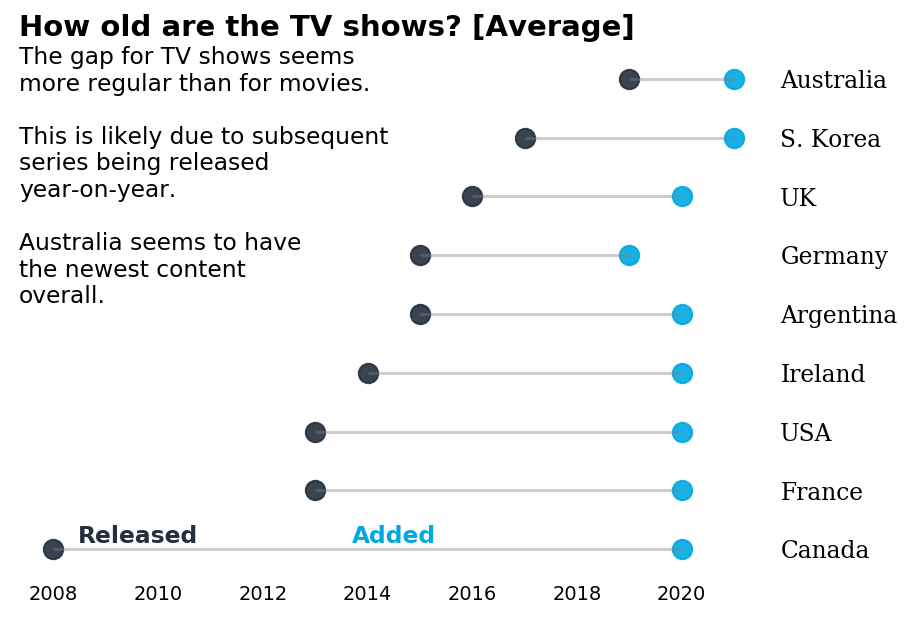

In [64]:
data = df_tv.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')['release_year','year_added'].mean().round()


# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)


fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#232F3E',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#00A8E1',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)


fig.text(0.19,0.175,"Released", fontweight="bold", fontsize=12, color='#232F3E')

fig.text(0.47,0.175,"Added", fontweight="bold", fontsize=12, color='#00A8E1')


fig.text(0.13, 0.48, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Australia seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light')


ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

# Lastly, we can view a wordcloud to get an overview of Disney Plus titles, descriptions and Directors


It is interesting to note that many films share the same key words in their titles.

In [18]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub = data_sub.reset_index()
print(data_sub.head(12))
print(data_sub.dtypes)

type month_name_added  TV Show  Movie
0               April       25     86
1              August       21     50
2            December       13     52
3            February       18     44
4             January       23     61
5                July       35     85
6                June       22     52
7               March        9     22
8                 May       30     62
9            November      144    808
10            October       22     63
11          September       31     59
type
month_name_added    object
TV Show              int64
Movie                int64
dtype: object
